<a href="https://colab.research.google.com/github/MaitreePimple/Data-Science/blob/main/Task_2_Predicting_customer_buying_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
print(df.head())
print(df.info())
print(df['booking_complete'].value_counts())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [11]:
# Convert categorical columns using one-hot encoding or label encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'booking_origin'], drop_first=True)

# Optional: create new features
df['lead_to_stay_ratio'] = df['purchase_lead'] / (df['length_of_stay'] + 1)

# Define feature matrix and target
X = df.drop(columns=['booking_complete', 'route'])  # route could be used later if needed
y = df['booking_complete']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.53      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000

[[8387  133]
 [1327  153]]


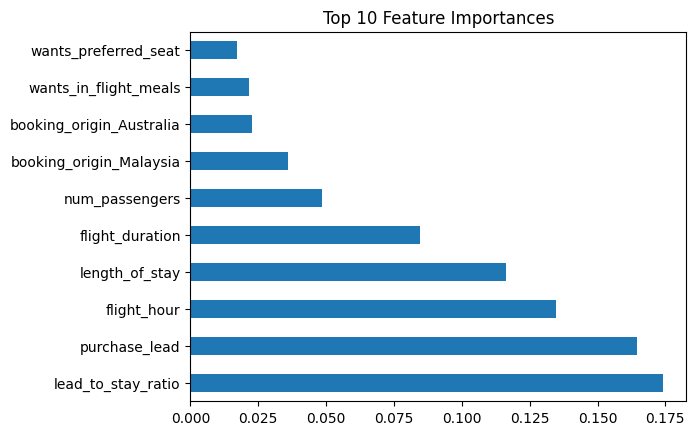

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.53      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000



In [15]:
feat_importances.nlargest(5)

,0
lead_to_stay_ratio,0.174079
purchase_lead,0.164626
flight_hour,0.134759
length_of_stay,0.116391
flight_duration,0.084472
